# One Vs All Classification

In [1]:
import numpy as np
import scipy.io as sio
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
data = sio.loadmat('data/multi_class_classification.mat')
x=data['X']
y=data['y']
print(x.shape)
print(y.shape)
X=np.c_[np.ones(x.shape[0]),x]
print(X.shape)

(5000, 400)
(5000, 1)
(5000, 401)


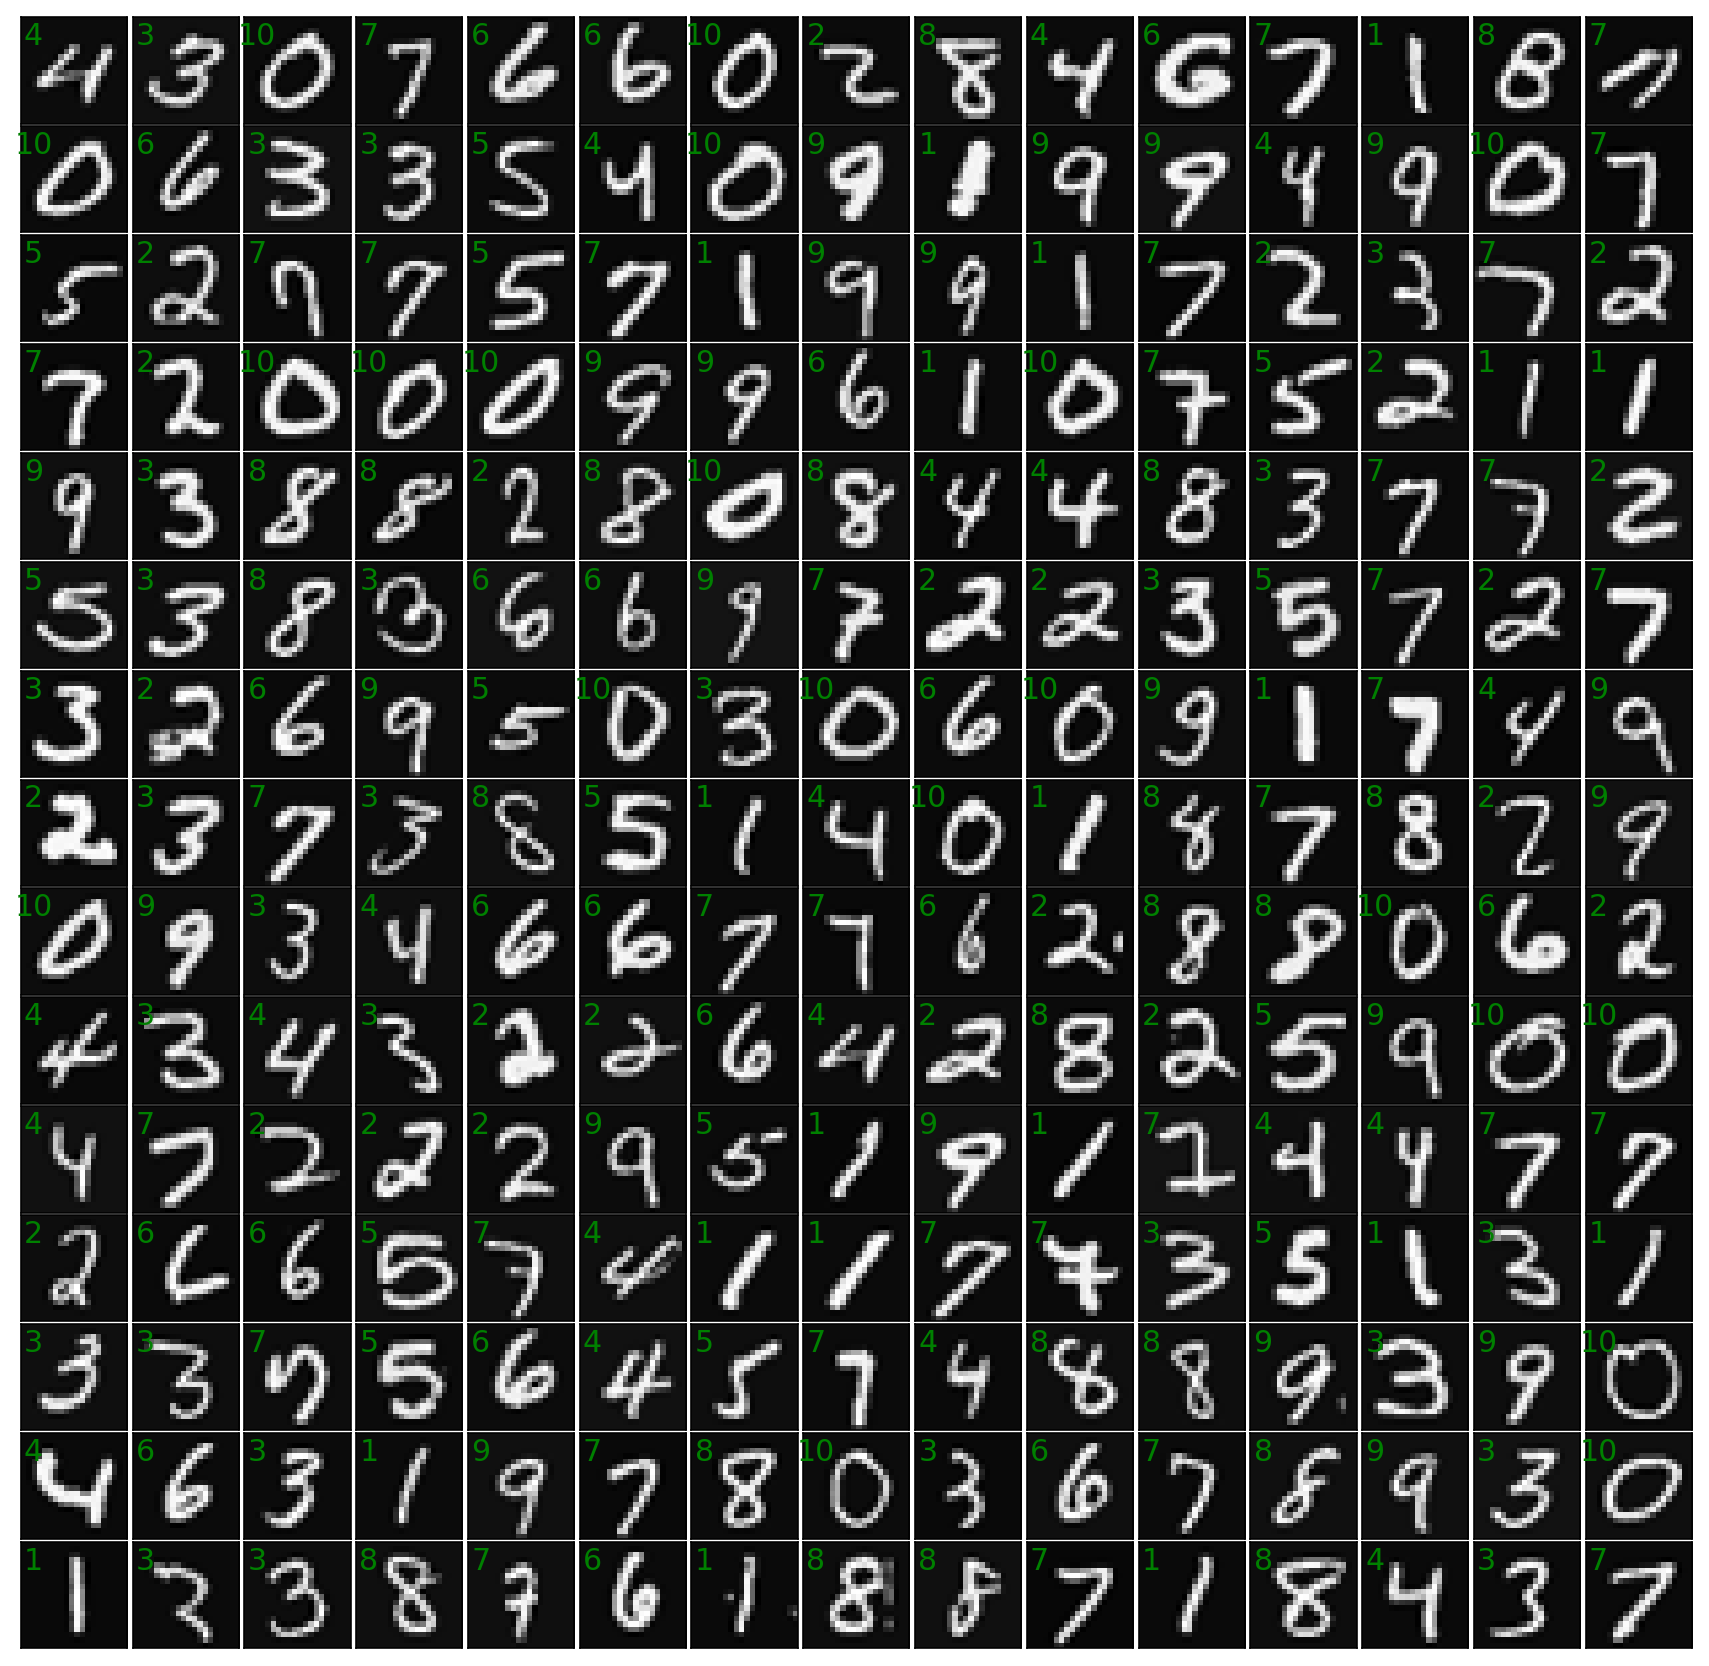

In [3]:
#visualize data
def visualize(x,y_pred,y):
    fig, axes = plt.subplots(nrows=15,ncols=15,figsize=(15,15))
    plt.subplots_adjust(wspace=0.025,hspace=0.025)
    for ax in axes.flatten():
        i=np.random.randint(x.shape[0])
        img = np.reshape(x[i],(20,20))
        img = img.T
        ax.imshow(img,cmap='gray')
        if y_pred[i] == y[i]:
            ax.set_title('{}'.format(y_pred[i][0]), color='g', fontsize=15, x=0.12,y=0.63)
        else:
            ax.set_title('{},{}'.format(y_pred[i][0],y[i][0]), color='r', fontsize=15, x=0.2,y=0.63)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
visualize(x,y,y)

### Regularized Cost
\begin{equation}
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\left[ -y^{(i)} log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))\right] 
+ \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2.
\end{equation}

### Gradients for regularized cost
\begin{equation}
\frac{\partial J(\theta)}{\partial\theta_0} = \frac{1}{m} \sum_{i=1}^{m} \left(h_{\theta}(x^{(i)}) - y^{(i)}\right)
\end{equation}

\begin{equation}
\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left(h_{\theta}(x^{(i)}) - y^{(i)}\right) 
+ \frac{\lambda}{m} \theta_j
\end{equation}

In [4]:
#sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#compute cost
def cost_reg(theta,*args):
    x,y,lambd = args
    m = np.shape(x)[0]
    theta = np.reshape(theta,(np.shape(x)[1],1))
    y_hat = sigmoid(np.dot(x,theta))
    cost = (-(1/m)* np.sum((y*np.log(y_hat)+ (1-y)*np.log(1-y_hat)))
            + ((lambd/(2*m))* np.sum(theta[1:,0]**2)))
    return cost

#compute gradients
def grad_reg(theta,*args):
    x,y,lambd = args
    m = np.shape(x)[0]
    theta = np.reshape(theta,(np.shape(x)[1],1))
    y_hat = sigmoid(np.dot(x,theta))
    theta_dummy = np.copy(theta)
    theta_dummy[0,0]=0 
    grad = ((1/m)* (np.dot(np.transpose(x),y_hat - y)) +
            (lambd/m)*theta_dummy)
    return np.ndarray.flatten(grad)

In [5]:
#train one vs all logistic regression classifier classifier
initial_theta = np.zeros((X.shape[1],1))
lambd = 1
Phi = np.zeros((np.count_nonzero(np.unique(y)),X.shape[1]))
print(initial_theta.shape)
print(Phi.shape)
for i in range(1,Phi.shape[0]+1):
    y_i = (y==i).astype(int)
    res_i = optimize.minimize(fun=cost_reg, x0=initial_theta, args=(X,y_i,lambd), jac=grad_reg, method='CG', options={'maxiter':400, 'disp':False})
    Phi[i-1,:] = res_i['x']

(401, 1)
(10, 401)


In [6]:
#one vs all prediction
Phi_expanded = np.expand_dims(Phi,axis=1)
temp = Phi_expanded * X
temp1 = np.sum(temp,axis=-1)
predictions = sigmoid(temp1)
predictions_final = np.argmax(predictions,axis=0)
y_pred = np.reshape(predictions_final,(y.shape[0],1))
#adding 1 because python indexing starts from 0, and therefore class predictions need to be bumped up.
y_pred = y_pred + 1

accuracy = np.mean(y_pred == y)*100
print("Accuracy: {}%".format(accuracy))

Accuracy: 94.46%


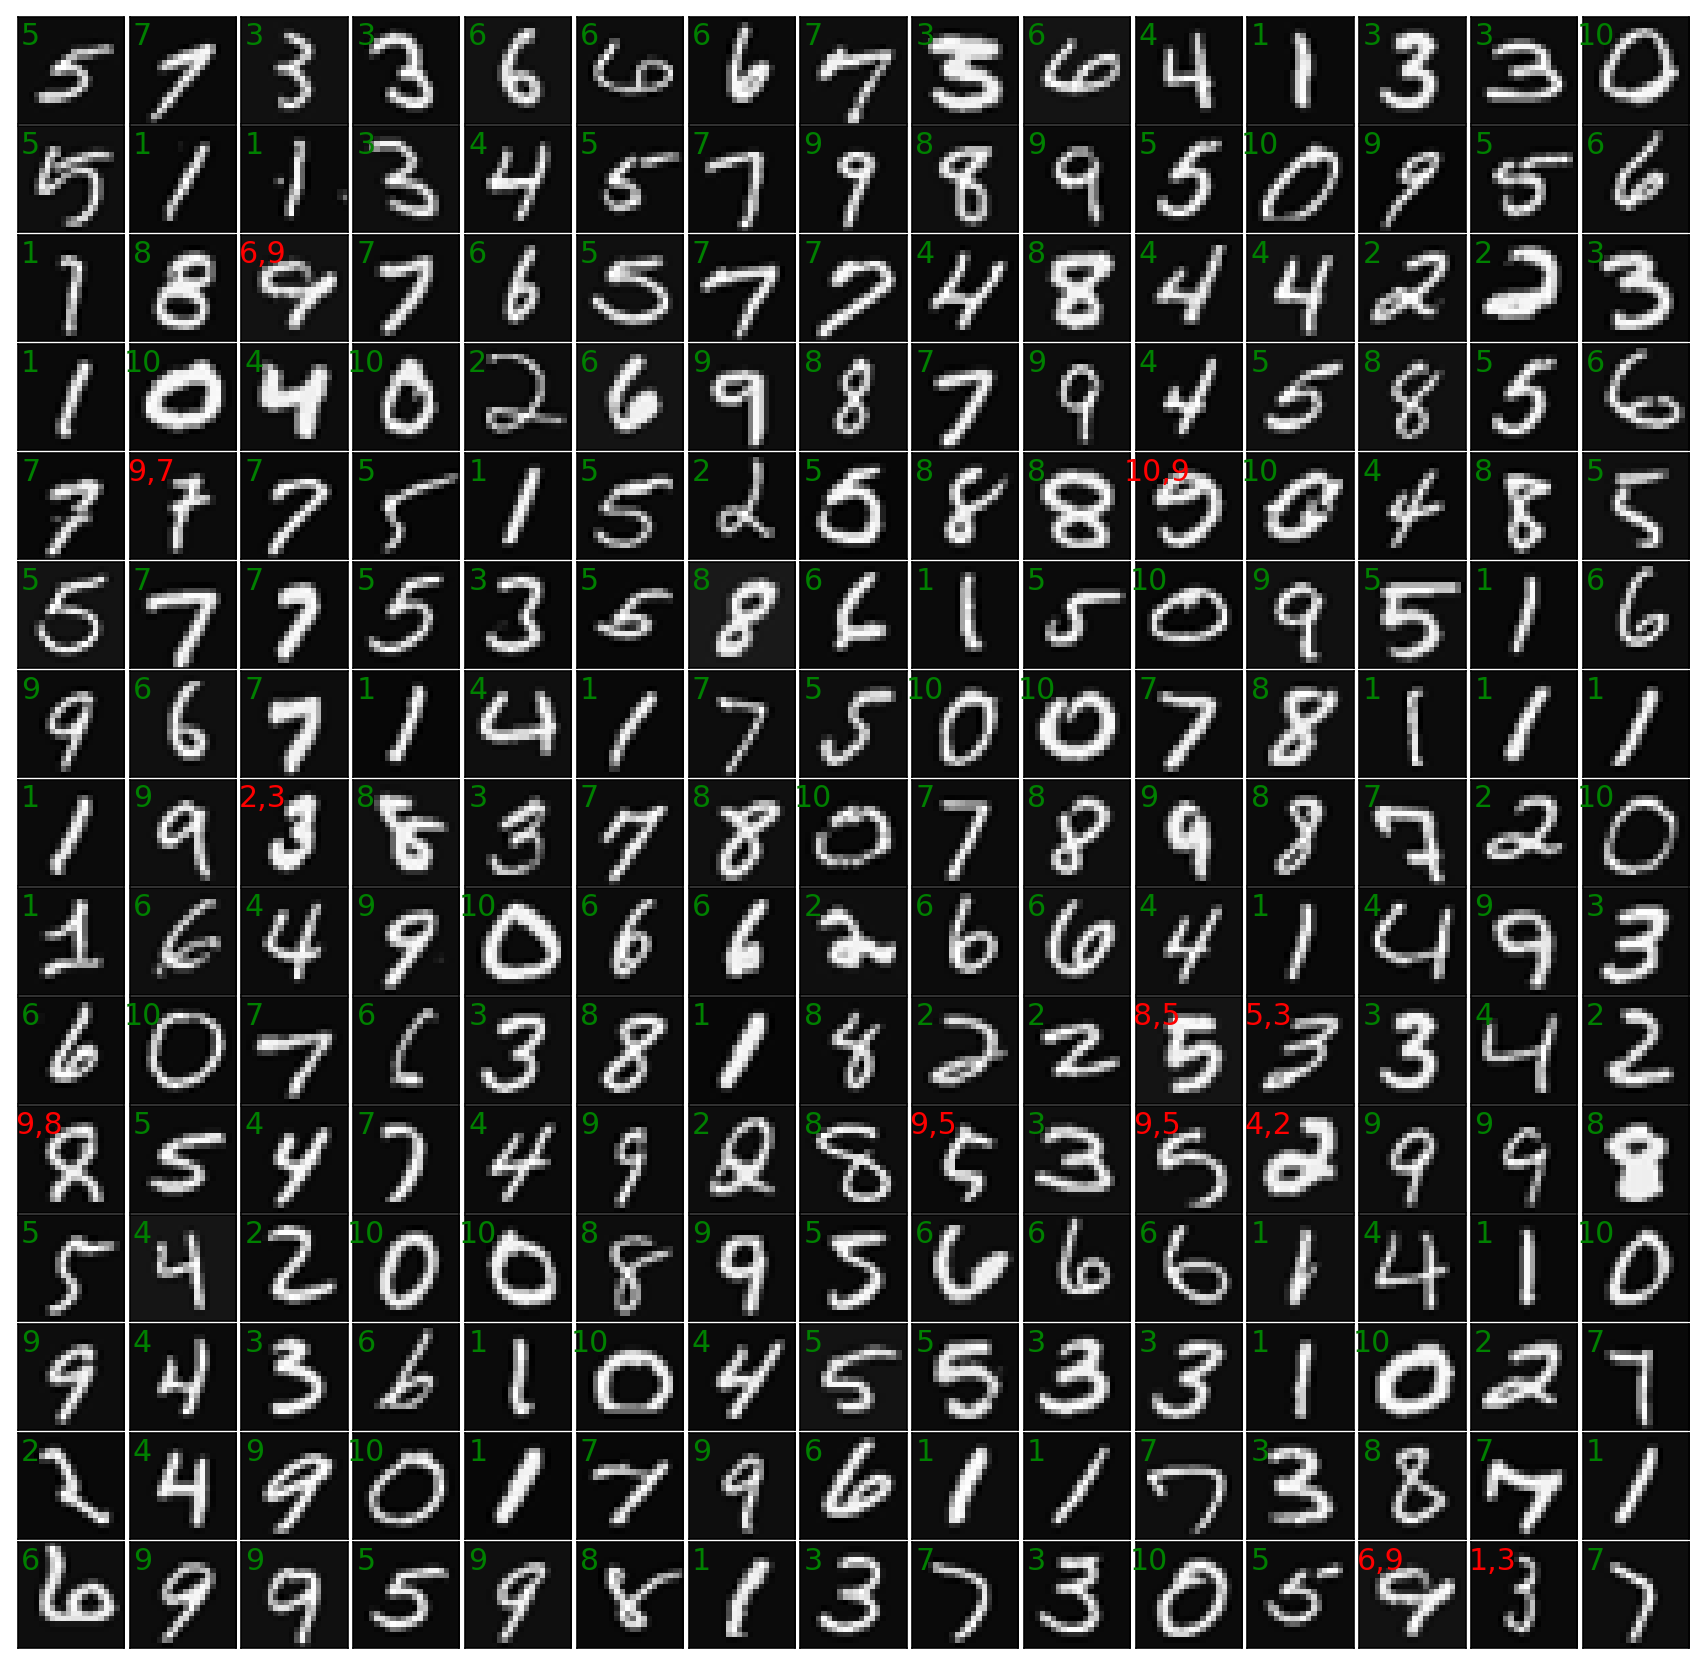

In [7]:
#visualize predictions
visualize(x,y_pred,y)

# Neural Networks

In [8]:
weights = sio.loadmat('data/neural_networks.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']
print(theta1.shape)
print(theta2.shape)
print(X.shape)

(25, 401)
(10, 26)
(5000, 401)


In [9]:
def predict(X,theta1,theta2):
    z2 = np.dot(theta1,X.T)
    a2 = sigmoid(z2)
    
    a2 = np.r_[np.ones((1,a2.shape[1])),a2]
    z3 = np.dot(theta2,a2)
    a3 = sigmoid(z3)
    
    y_pred_nn = np.argmax(a3,axis=0)
    #add 1 because python indexing starts from 0. 
    y_pred_nn = y_pred_nn + 1
    return y_pred_nn

y_pred_nn = predict(X,theta1,theta2)
y_pred_nn = np.reshape(y_pred_nn,(y_pred_nn.size,1))

In [10]:
print(y_pred_nn.shape)
accuracy = np.mean(y_pred_nn == y)*100
print("Accuracy: {}%".format(accuracy))

(5000, 1)
Accuracy: 97.52%


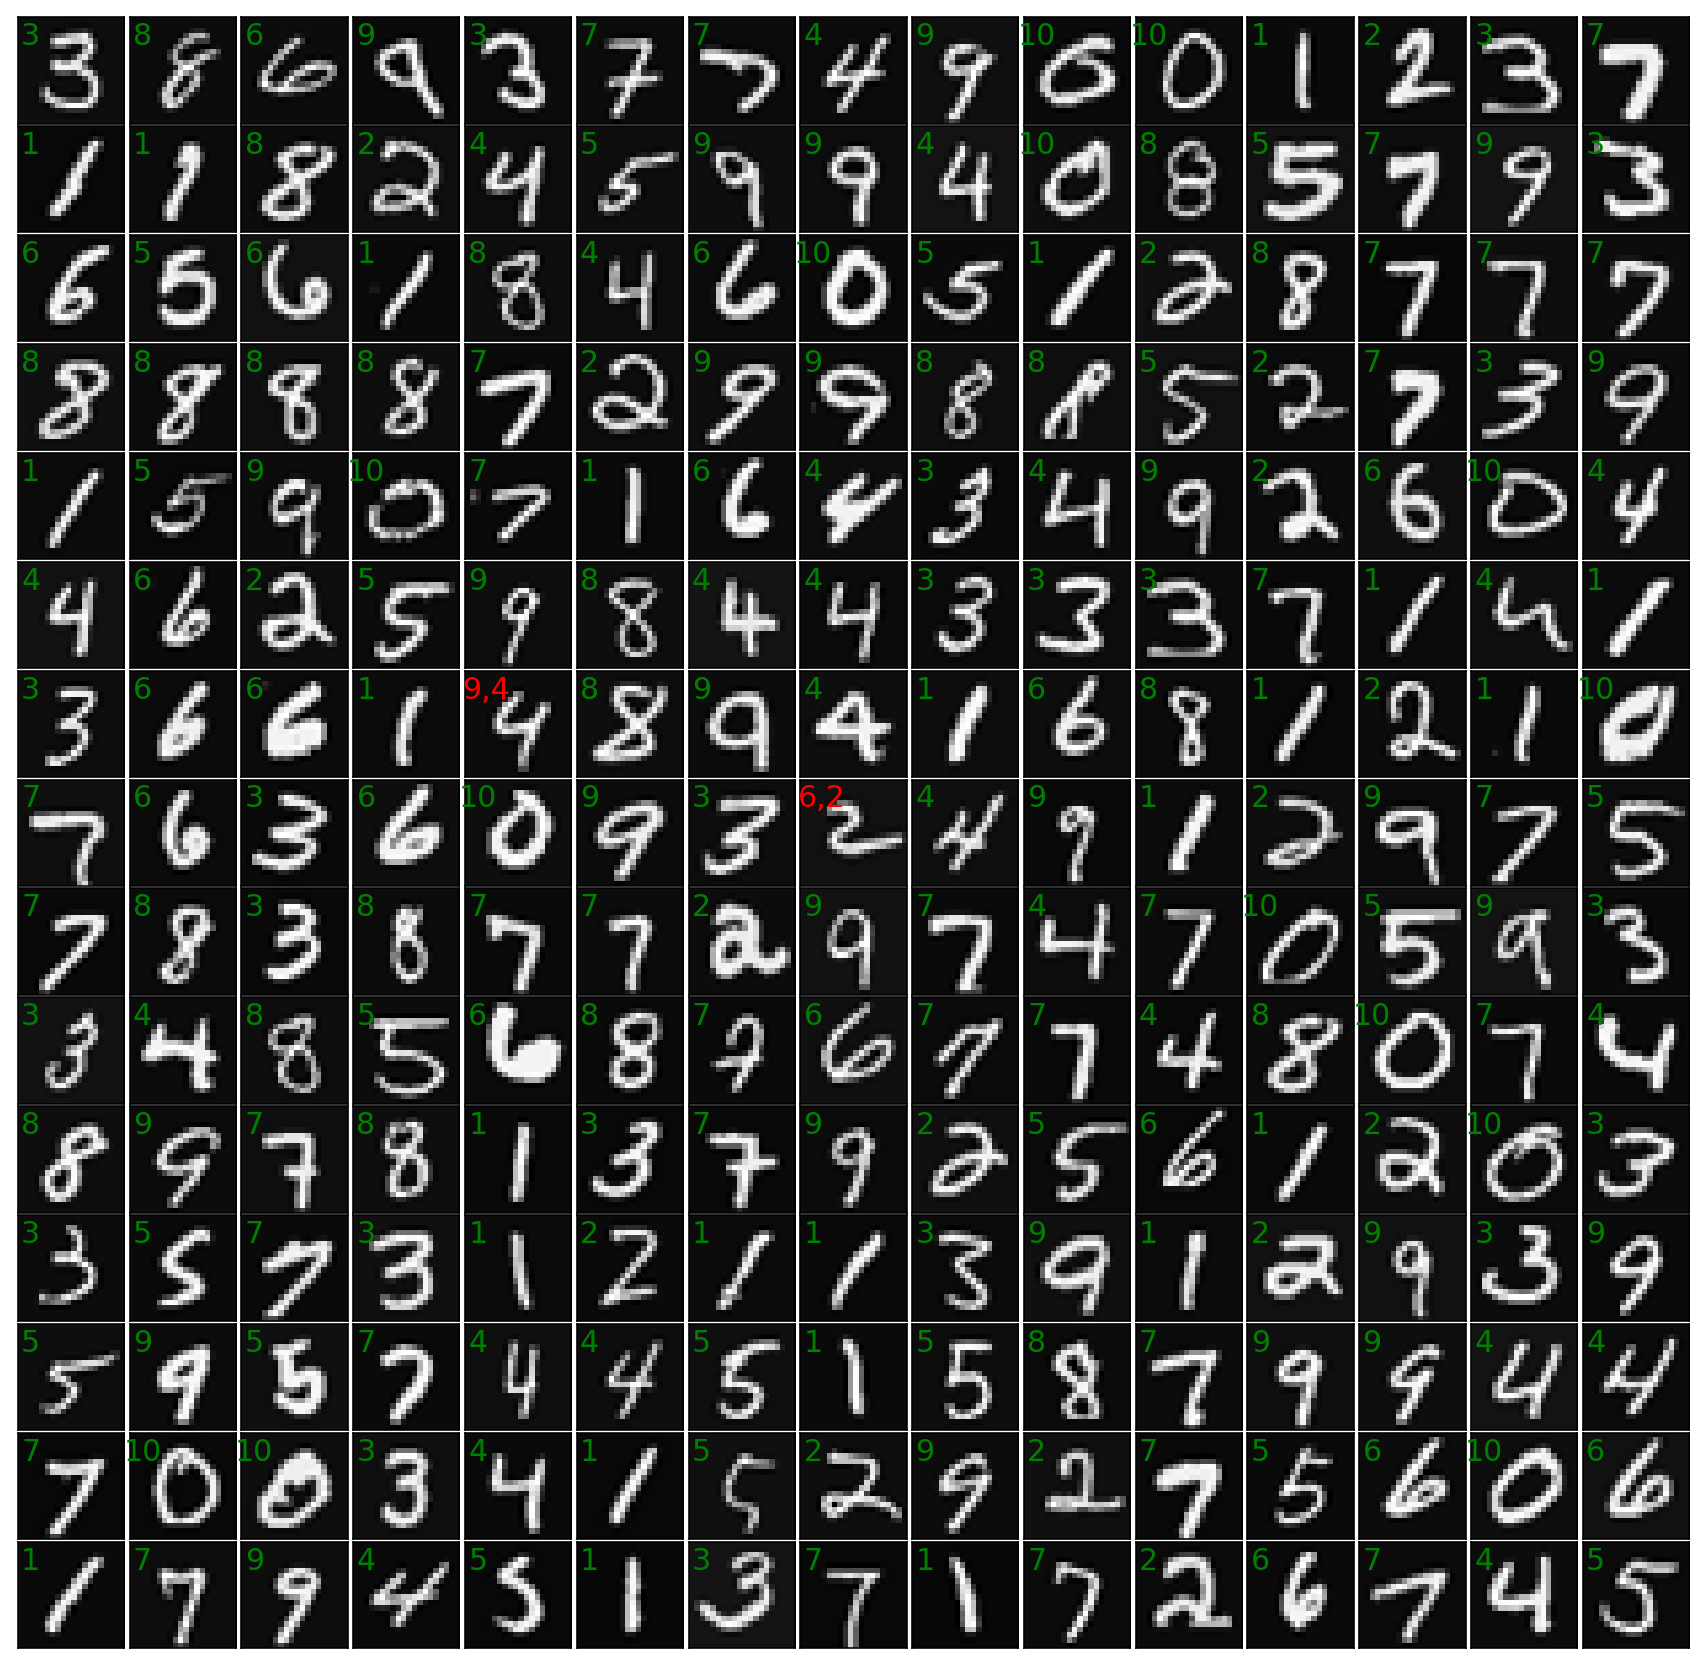

In [11]:
#visualize predictions
visualize(x,y_pred_nn,y)